### Diamond - Price

This dataset consists of 6000 rows and 8 columns.

In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [2]:
#Standard Imports
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import probplot
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression,Ridge, Lasso, ElasticNet, RidgeCV, LassoCV,ElasticNetCV
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [3]:
#Reading csv
df_diamond = pd.read_csv("../Beginner_Dataset/beginner_datasets/diamond.csv")
df_diamond.head()

,Carat Weight,Cut,Color,Clarity,Polish,Symmetry,Report,Price
0,1.10,Ideal,H,SI1,VG,EX,GIA,5169
1,0.83,Ideal,H,VS1,ID,ID,AGSL,3470
2,0.85,Ideal,H,SI1,EX,EX,GIA,3183
3,0.91,Ideal,E,SI1,VG,VG,GIA,4370
4,0.83,Ideal,G,SI1,EX,EX,GIA,3171


In [4]:
#Look for nul values
df_diamond.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6000 entries, 0 to 5999
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Carat Weight  6000 non-null   float64
 1   Cut           6000 non-null   object 
 2   Color         6000 non-null   object 
 3   Clarity       6000 non-null   object 
 4   Polish        6000 non-null   object 
 5   Symmetry      6000 non-null   object 
 6   Report        6000 non-null   object 
 7   Price         6000 non-null   int64  
dtypes: float64(1), int64(1), object(6)
memory usage: 375.1+ KB


In [5]:
df_diamond.describe()

,Carat Weight,Price
count,6000.000000,6000.000000
mean,1.334520,11791.579333
std,0.475696,10184.350051
min,0.750000,2184.000000
25%,1.000000,5150.500000
50%,1.130000,7857.000000
75%,1.590000,15036.500000
max,2.910000,101561.000000


In [6]:
#To find the unique values in the Categorical Columns - Carat Weight, Cut,Color,Clarity,Polish,Symmetry,Report

for col in df_diamond.columns:
    if df_diamond[col].dtype == 'object':
        print(col," : ",df_diamond[col].unique())

Cut  :  ['Ideal' 'Very Good' 'Fair' 'Good' 'Signature-Ideal']
Color  :  ['H' 'E' 'G' 'D' 'F' 'I']
Clarity  :  ['SI1' 'VS1' 'VS2' 'VVS2' 'VVS1' 'IF' 'FL']
Polish  :  ['VG' 'ID' 'EX' 'G']
Symmetry  :  ['EX' 'ID' 'VG' 'G']
Report  :  ['GIA' 'AGSL']


**To find the relationship between the independent categorical variables and price**

Pandas **dataframe.groupby()** function is used to split the data into groups based on some criteria. pandas objects can be split on any of their axes. The abstract definition of grouping is to provide a mapping of labels to group names.

Splitting the Object. Applying function. Combining the result

Under applying function, performs following operations:

- Aggregation − computing a summary statistic

- Transformation − perform some group-specific operation

- Filtration − discarding the data with some condition

In [7]:
#Cut seems to be an ordinal variable but matters
#https://stats.oarc.ucla.edu/other/mult-pkg/whatstat/what-is-the-difference-between-categorical-ordinal-and-interval-variables/
df_diamond.groupby('Cut').describe()
grp_cut = df_diamond.groupby('Cut')
grp_cut.first()

#Using for loop
for name,value in grp_cut:
    print(name)
    print(value)

Carat Weight                                                \
                       count      mean       std   min   25%   50%     75%   
Cut                                                                          
Fair                   129.0  1.058682  0.274748  0.75  0.90  1.00  1.0100   
Good                   708.0  1.268927  0.444033  0.75  1.00  1.01  1.5100   
Ideal                 2482.0  1.382293  0.489068  0.75  1.02  1.20  1.6900   
Signature-Ideal        253.0  1.205217  0.340934  0.75  1.04  1.12  1.2600   
Very Good             2428.0  1.332941  0.481619  0.75  1.00  1.11  1.6125   

                        Price                                              \
                  max   count          mean           std     min     25%   
Cut                                                                         
Fair             2.02   129.0   5886.178295   4107.686751  2594.0  4036.0   
Good             2.91   708.0   9326.656780   7459.590917  2184.0  4560.5   
Ideal            2.82  2482.0  13127.331185  11043.822620  2383.0  5861.5   
Signature-Ideal  2.39   253.0  11541.525692   9656.204024  2793.0  7079.0   
Very Good        2.80  2428.0  11484.696870   9968.077797  2348.0  4974.5   

                                             
                    50%       75%       max  
Cut                                          
Fair             4646.0   5681.00   29368.0  
Good             5918.0  11559.75   52570.0  
Ideal            9143.0  16988.00  101561.0  
Signature-Ideal  9330.0  12869.00   81399.0  
Very Good        7207.0  15270.25   93813.0

,Carat Weight,Color,Clarity,Polish,Symmetry,Report,Price
Cut,,,,,,,
Fair,1.50,F,SI1,VG,VG,GIA,10450
Good,1.01,E,SI1,G,G,GIA,5161
Ideal,1.10,H,SI1,VG,EX,GIA,5169
Signature-Ideal,0.77,F,SI1,EX,EX,GIA,3321
Very Good,1.00,D,SI1,VG,G,GIA,5747


Fair
      Carat Weight   Cut Color Clarity Polish Symmetry Report  Price
7             1.50  Fair     F     SI1     VG       VG    GIA  10450
55            1.01  Fair     D     SI1     VG        G    GIA   5628
83            0.91  Fair     F     SI1     VG        G    GIA   4036
133           1.01  Fair     D     SI1     EX        G    GIA   5122
143           1.00  Fair     F     VS1     EX       VG    GIA   6627
...            ...   ...   ...     ...    ...      ...    ...    ...
5707          1.02  Fair     I     VS2     VG        G    GIA   4091
5743          1.00  Fair     E     SI1     VG        G    GIA   5384
5754          0.90  Fair     I    VVS2     VG       VG    GIA   3288
5825          1.01  Fair     G      IF     VG       VG    GIA   7344
5858          1.01  Fair     E     SI1     VG        G    GIA   4816

[129 rows x 8 columns]
Good
      Carat Weight   Cut Color Clarity Polish Symmetry Report  Price
11            1.01  Good     E     SI1      G        G    GIA   5161


In [8]:
# color might be nominal... there is a variation but its not huge
df_diamond.groupby('Color').describe()

Carat Weight                                                      \
             count      mean       std   min   25%   50%     75%   max   
Color                                                                    
D            661.0  1.264871  0.469151  0.75  0.92  1.04  1.5100  2.81   
E            778.0  1.224653  0.454995  0.75  0.91  1.02  1.4050  2.80   
F           1013.0  1.308243  0.469075  0.75  1.00  1.09  1.5400  2.79   
G           1501.0  1.365723  0.475178  0.75  1.01  1.17  1.7100  2.78   
H           1079.0  1.381010  0.488728  0.75  1.01  1.20  1.8700  2.82   
I            968.0  1.397676  0.467753  0.75  1.01  1.24  1.6525  2.91   

        Price                                                                 \
        count          mean           std     min      25%     50%       75%   
Color                                                                          
D       661.0  15255.783661  16687.842648  2945.0  5380.00  7567.0  16697.00   
E       778.0  11539.190231  10919.664034  2548.0  4844.00  7059.5  12592.00   
F      1013.0  12712.241856  10538.160822  2648.0  5261.00  8860.0  16545.00   
G      1501.0  12520.050633   9040.266775  2579.0  6127.00  8800.0  17176.00   
H      1079.0  10487.347544   7420.115869  2396.0  4871.50  7169.0  15537.50   
I       968.0   8989.636364   5786.080140  2184.0  4599.75  6655.0  11907.75   

                 
            max  
Color            
D      101561.0  
E       67240.0  
F       60188.0  
G       46861.0  
H       36709.0  
I       31254.0

In [9]:
df_diamond.groupby('Clarity').describe()

# to be frank, for now i don't know if i can properly interpret this way so i'll use some plots which will make it easy

# we can also just use target guided ordinal encoding so we'll look into that too... (replace with means)

Carat Weight                                                        \
               count      mean       std   min    25%    50%     75%   max   
Clarity                                                                      
FL               4.0  1.967500  0.506713  1.56  1.605  1.825  2.1875  2.66   
IF             219.0  1.442922  0.499170  0.76  1.030  1.250  2.0000  2.79   
SI1           2059.0  1.245114  0.442912  0.75  0.920  1.040  1.5100  2.91   
VS1           1192.0  1.411695  0.490421  0.75  1.020  1.220  2.0100  2.82   
VS2           1575.0  1.378292  0.496855  0.75  1.010  1.160  2.0000  2.79   
VVS1           285.0  1.366421  0.471512  0.75  1.030  1.210  1.5800  2.66   
VVS2           666.0  1.316186  0.440886  0.75  1.010  1.180  1.5100  2.79   

          Price                                                          \
          count          mean           std      min       25%      50%   
Clarity                                                                   
FL          4.0  63776.000000  29960.681490  33868.0  40975.00  62371.5   
IF        219.0  22105.844749  19372.027289   3304.0   9421.50  12647.0   
SI1      2059.0   8018.864012   5803.828532   2241.0   4405.00   5417.0   
VS1      1192.0  13694.113255  10285.657956   2184.0   6565.50   9245.0   
VS2      1575.0  11809.053333   8688.469192   2444.0   5769.00   7568.0   
VVS1      285.0  16845.680702  14184.780039   3191.0   8712.00  11142.0   
VVS2      666.0  14142.177177  11486.667663   2589.0   7899.25  10266.0   

                            
             75%       max  
Clarity                     
FL       85172.5   96493.0  
IF       29531.5  101561.0  
SI1       9977.5   34461.0  
VS1      19663.5   66554.0  
VS2      16932.0   43163.0  
VVS1     17279.0   75630.0  
VVS2     14977.0   77033.0

Internet says:

    1. boxplots
    2. jittered plots
        A jitter plot is a variant of the strip plot with a better view of overlapping data points, used to visualise the distribution of many individual one-dimensional values.
    3. violin plots

##### JITTERED PLOT / STRIPPLOT

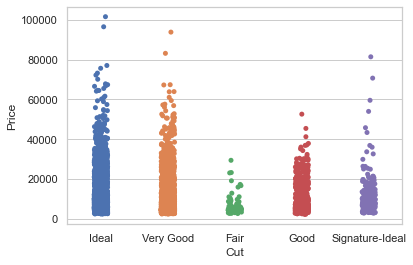

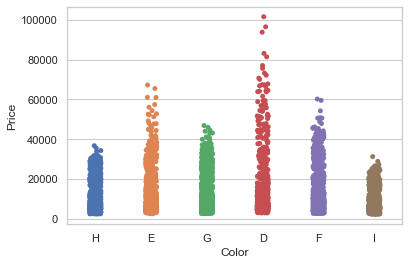

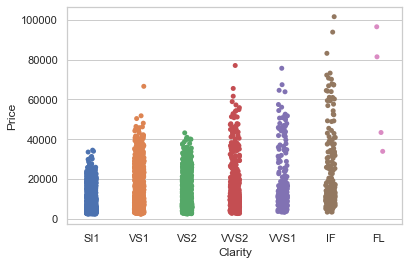

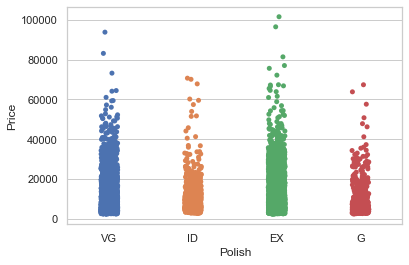

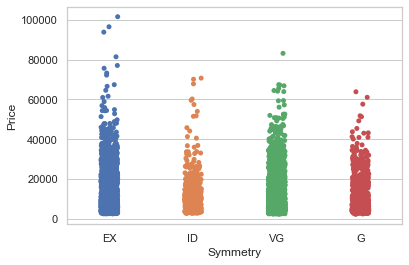

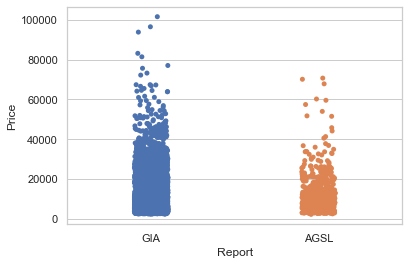

In [10]:
#It is jittered plot  
for col in df_diamond.columns:
    if df_diamond[col].dtype == 'object':
        sns.set_theme(style = "whitegrid")
        ax = sns.stripplot(x=col,y='Price',data=df_diamond)
        plt.show()


##### BOX PLOT

C:\Users\deept\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


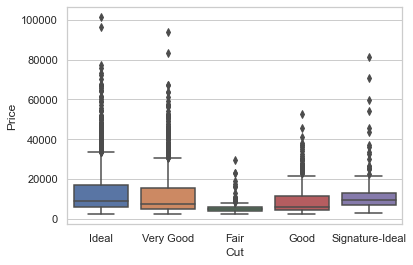

C:\Users\deept\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


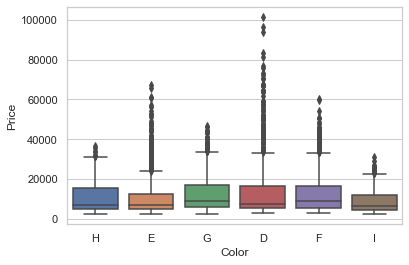

C:\Users\deept\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


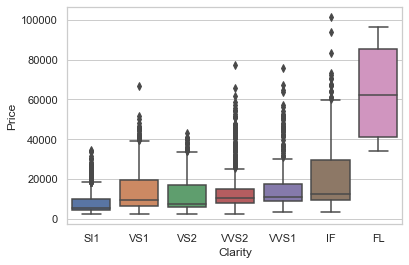

C:\Users\deept\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


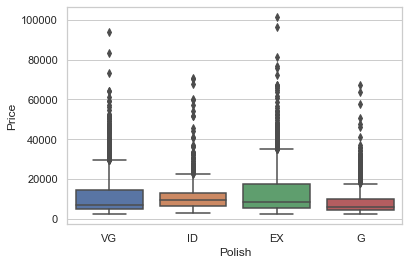

C:\Users\deept\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


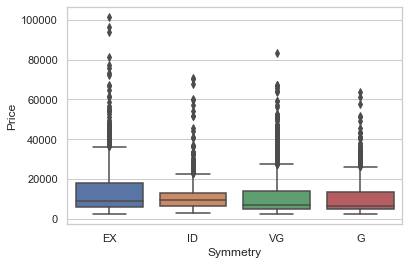

C:\Users\deept\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


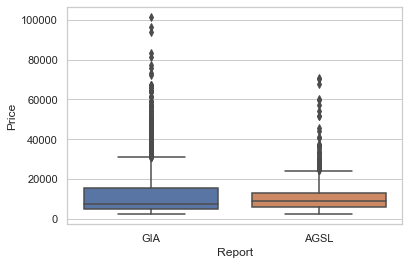

,Carat Weight,Cut,Color,Clarity,Polish,Symmetry,Report,Price
0,1.10,Ideal,H,SI1,VG,EX,GIA,5169
1,0.83,Ideal,H,VS1,ID,ID,AGSL,3470
2,0.85,Ideal,H,SI1,EX,EX,GIA,3183
3,0.91,Ideal,E,SI1,VG,VG,GIA,4370
4,0.83,Ideal,G,SI1,EX,EX,GIA,3171


In [11]:
for col in df_diamond.columns:
    if df_diamond[col].dtype == 'object':
        sns.set_theme(style = "whitegrid")
        ax = sns.boxplot(df_diamond[col],df_diamond['Price'])
        plt.show()

df_diamond.head()

##### VIOLIN PLOT

**from seaborn:-**

A violin plot plays a similar role as a box and whisker plot. It shows the distribution of quantitative data across several 
levels of one (or more) categorical variables such that those distributions can be compared. Unlike a box plot, in which all 
of the plot components correspond to actual datapoints, the violin plot features a kernel density estimation of the
underlying distribution.

C:\Users\deept\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


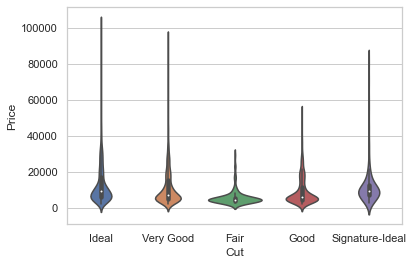

C:\Users\deept\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


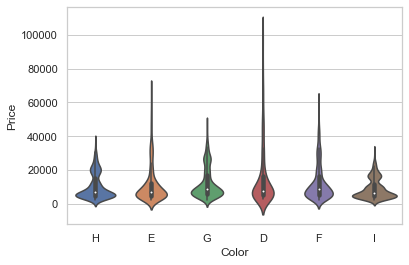

C:\Users\deept\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


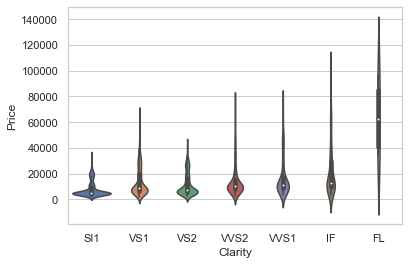

C:\Users\deept\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


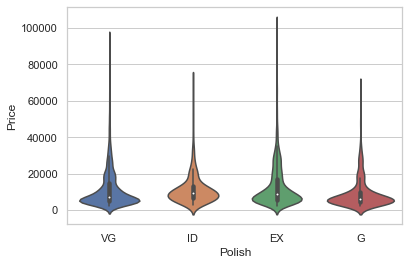

C:\Users\deept\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


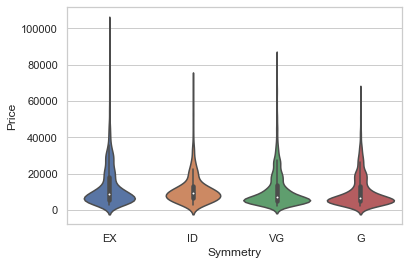

C:\Users\deept\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


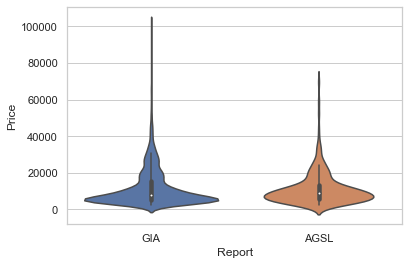

In [12]:
for col in df_diamond.columns:
    if df_diamond[col].dtype == 'object':
        sns.set_theme(style = "whitegrid")
        ax = sns.violinplot(df_diamond[col],df_diamond['Price'])
        plt.show()

#### Feature Engineering

Now, lets use this to encode our categorical data

In [13]:
#ok we'll try target guided ordinal encoding first using mean of the Price
df_diamond.head()

cut_val = df_diamond.groupby('Cut').describe()['Price']['mean'].to_dict()
cut_val
color_vals = df_diamond.groupby('Color').describe()['Price']['mean'].to_dict()
color_vals
clarity_vals = df_diamond.groupby('Clarity').describe()['Price']['mean'].to_dict()
clarity_vals
polish_vals = df_diamond.groupby('Polish').describe()['Price']['mean'].to_dict()
polish_vals
symmetry_vals = df_diamond.groupby('Symmetry').describe()['Price']['mean'].to_dict()
symmetry_vals
report_vals = df_diamond.groupby('Report').describe()['Price']['mean'].to_dict()
report_vals

,Carat Weight,Cut,Color,Clarity,Polish,Symmetry,Report,Price
0,1.10,Ideal,H,SI1,VG,EX,GIA,5169
1,0.83,Ideal,H,VS1,ID,ID,AGSL,3470
2,0.85,Ideal,H,SI1,EX,EX,GIA,3183
3,0.91,Ideal,E,SI1,VG,VG,GIA,4370
4,0.83,Ideal,G,SI1,EX,EX,GIA,3171


{'Fair': 5886.178294573643,
 'Good': 9326.656779661016,
 'Ideal': 13127.331184528606,
 'Signature-Ideal': 11541.525691699604,
 'Very Good': 11484.69686985173}

{'D': 15255.783661119516,
 'E': 11539.190231362469,
 'F': 12712.241855873643,
 'G': 12520.050632911392,
 'H': 10487.347544022243,
 'I': 8989.636363636364}

{'FL': 63776.0,
 'IF': 22105.844748858446,
 'SI1': 8018.864011656144,
 'VS1': 13694.113255033557,
 'VS2': 11809.053333333333,
 'VVS1': 16845.680701754387,
 'VVS2': 14142.177177177176}

{'EX': 12918.599175257732,
 'G': 9271.22591943958,
 'ID': 11693.848739495797,
 'VG': 11278.606475716064}

{'EX': 13201.976687712482,
 'G': 10412.350436681223,
 'ID': 11656.302631578947,
 'VG': 11146.818783616052}

{'AGSL': 11423.529972752043, 'GIA': 11842.879794910748}

In [14]:
#Now replace the categorical cols with ordinal encoded values and change the type to "int"
#Used int as float takes more space
df_diamond['tg_'+'cut'] = df_diamond['Cut'].replace(cut_val).astype('int')
df_diamond['tg_'+'color'] = df_diamond['Color'].replace(color_vals).astype('int')
df_diamond['tg_'+'clarity'] = df_diamond['Clarity'].replace(clarity_vals).astype('int')
df_diamond['tg_'+'polish'] = df_diamond['Polish'].replace(polish_vals).astype('int')
df_diamond['tg_'+'symmetry'] = df_diamond['Symmetry'].replace(symmetry_vals).astype('int')
df_diamond['tg_'+'report'] = df_diamond['Report'].replace(report_vals).astype('int')


<Figure size 432x432 with 0 Axes>

<AxesSubplot:>

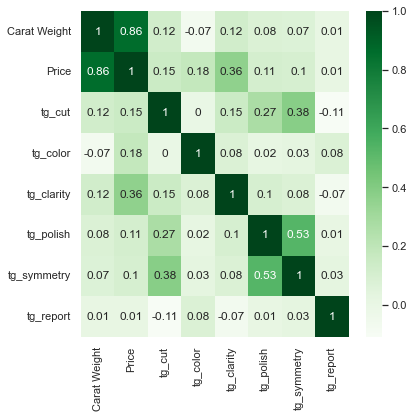

In [15]:
# lets use a heat map to see the correlation
cor = np.round(df_diamond.corr(),2)
plt.figure(figsize=(6,6))
sns.heatmap(cor,annot = True,cmap = 'Greens')

In [16]:
#Checking with other describe values and see how the result
# '''
# for i in ['min','max', '50%','25%','75%']:
#     cut_val = df_diamond.groupby('Cut').describe()['Price'][i].to_dict()
#     color_vals = df_diamond.groupby('Color').describe()['Price'][i].to_dict()
#     clarity_vals = df_diamond.groupby('Clarity').describe()['Price'][i].to_dict()
#     polish_vals = df_diamond.groupby('Polish').describe()['Price'][i].to_dict()
#     symmetry_vals = df_diamond.groupby('Symmetry').describe()['Price'][i].to_dict()
#     report_vals = df_diamond.groupby('Report').describe()['Price'][i].to_dict()

# df_diamond['tg_'+'cut'] = df_diamond['Cut'].replace(cut_val).astype('int')
# df_diamond['tg_'+'color'] = df_diamond['Color'].replace(color_vals).astype('int')
# df_diamond['tg_'+'clarity'] = df_diamond['Clarity'].replace(clarity_vals).astype('int')
# df_diamond['tg_'+'polish'] = df_diamond['Polish'].replace(polish_vals).astype('int')
# df_diamond['tg_'+'symmetry'] = df_diamond['Symmetry'].replace(symmetry_vals).astype('int')
# df_diamond['tg_'+'report'] = df_diamond['Report'].replace(report_vals).astype('int')

# cor = np.round(df_diamond.corr(),2)
# plt.figure(figsize=(12,12))
# sns.heatmap(cor,annot = True,cmap = 'Greens')
# plt.show()


In [17]:
# tried to get these from the graphs, but they didnt work out that well though similar to mean

# cut_p  = {'Ideal':5, 'Very Good':4, 'Fair':1, 'Good':3, 'Signature-Ideal':2}
# color_p =  {'H':2, 'E':5, 'G':3,'D':6,'F':4, 'I':1}
# clarity_p =  {'SI1':1, 'VS1':3 ,'VS2':2, 'VVS2':5 ,'VVS1':4 ,'IF':7 ,'FL':6}
# polish_p =  {'VG':3 ,'ID':1, 'EX':4, 'G':2}
# symmetry_p =  {'EX':4, 'ID':1, 'VG':3, 'G':2}
# report_p =  {'GIA':2, 'AGSL':1}

# df_diamond['p_'+'cut'] = df_diamond['Cut'].replace(cut_p).astype('int')
# df_diamond['p_'+'color'] = df_diamond['Color'].replace(color_p).astype('int')
# df_diamond['p_'+'clarity'] = df_diamond['Clarity'].replace(clarity_p).astype('int')
# df_diamond['p_'+'polish'] = df_diamond['Polish'].replace(polish_p).astype('int')
# df_diamond['p_'+'symmetry'] = df_diamond['Symmetry'].replace(symmetry_p).astype('int')
# df_diamond['p_'+'report'] = df_diamond['Report'].replace(report_p).astype('int')

# cor = np.round(df_diamond.corr(),2)
# plt.figure(figsize=(10,10))
# sns.heatmap(cor, annot=True, cmap='Greens')

((array([-3.68241411, -3.44989761, -3.32188596, ...,  3.32188596,
          3.44989761,  3.68241411]),
  array([0.75, 0.75, 0.75, ..., 2.81, 2.82, 2.91])),
 (0.44389844414505014, 1.33452, 0.9327042173533211))

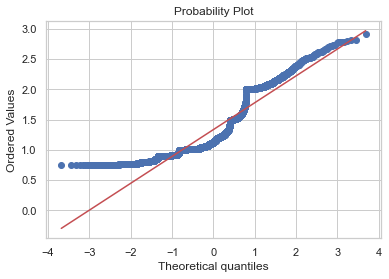

In [18]:
#looks like carat weight, cut, color, clarity matter are top most important
probplot(df_diamond['Carat Weight'], plot=plt)

((array([-3.68241411, -3.44989761, -3.32188596, ...,  3.32188596,
          3.44989761,  3.68241411]),
  array([ 0.421875,  0.421875,  0.421875, ..., 22.188041, 22.425768,
         24.642171])),
 (3.2237864459725754, 3.378393358, 0.8580286876968238))

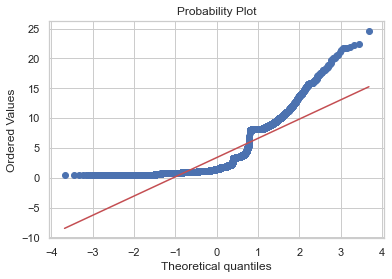

In [19]:
probplot(np.power(df_diamond['Carat Weight'],3), plot=plt)

C:\Users\deept\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Carat Weight', ylabel='Density'>

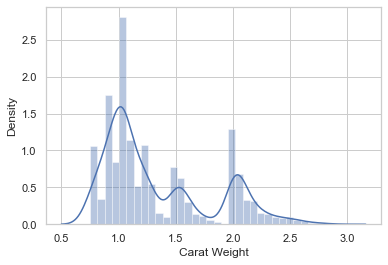

In [20]:
sns.distplot(df_diamond['Carat Weight'])

**Standard Scaler**

In [21]:
#Using of Standard Scaler
df_diamond.head()
X = df_diamond.drop(['Price','Cut','Color','Clarity','Polish','Symmetry','Report'], axis = 1)
y = df_diamond.Price

X.head()
y.head()

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

,Carat Weight,Cut,Color,Clarity,Polish,Symmetry,Report,Price,tg_cut,tg_color,tg_clarity,tg_polish,tg_symmetry,tg_report
0,1.10,Ideal,H,SI1,VG,EX,GIA,5169,13127,10487,8018,11278,13201,11842
1,0.83,Ideal,H,VS1,ID,ID,AGSL,3470,13127,10487,13694,11693,11656,11423
2,0.85,Ideal,H,SI1,EX,EX,GIA,3183,13127,10487,8018,12918,13201,11842
3,0.91,Ideal,E,SI1,VG,VG,GIA,4370,13127,11539,8018,11278,11146,11842
4,0.83,Ideal,G,SI1,EX,EX,GIA,3171,13127,12520,8018,12918,13201,11842


,Carat Weight,tg_cut,tg_color,tg_clarity,tg_polish,tg_symmetry,tg_report
0,1.10,13127,10487,8018,11278,13201,11842
1,0.83,13127,10487,13694,11693,11656,11423
2,0.85,13127,10487,8018,12918,13201,11842
3,0.91,13127,11539,8018,11278,11146,11842
4,0.83,13127,12520,8018,12918,13201,11842


0    5169
1    3470
2    3183
3    4370
4    3171
Name: Price, dtype: int64

**Variance Inflation Factor**

In [22]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
variables = X_scaled
variables[0]
variables.shape
variables.shape[1]
# we create a new data frame which will include all the VIFs
# note that each variable has its own variance inflation factor as this measure is variable specific (not model specific)
# we do not include categorical values for mulitcollinearity as they do not provide much information as numerical ones do

vif = pd.DataFrame()

# here we make use of the variance_inflation_factor, which will basically output the respective VIFs 
vif["VIF"] = [variance_inflation_factor(variables,i) for i in range(variables.shape[1])]

# Finally, I like to include names so it is easier to explore the result
vif["Features"] = X.columns

vif

array([-0.49304473,  0.89146012, -0.73152846, -1.0418513 , -0.46362026,
        1.31958667,  0.37334265])

(6000, 7)

7

,VIF,Features
0,1.035417,Carat Weight
1,1.220422,tg_cut
2,1.022210,tg_color
3,1.049932,tg_clarity
4,1.409379,tg_polish
5,1.522045,tg_symmetry
6,1.028926,tg_report


##### Feature Selection

we'll go with carat weight, cut, color, clarity (target encoded)

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 42)

**Linear Regression**

In [24]:
model = LinearRegression()
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
model.score(X_test,y_test)

LinearRegression()

0.8442834691979973

In [25]:
print(cross_val_score(model, X, y, cv=5))
np.mean(cross_val_score(model, X, y, cv=5))

[0.85336497 0.8596004  0.83869157 0.84240414 0.84420666]


0.8476535488135651

**Ridge Regression**

Ridge Regression is a popular type of regularized linear regression that includes an L2 penalty. This has the effect of shrinking the coefficients for those input variables that do not contribute much to the prediction task.

**Tuning Ridge Hyperparameters**

One approach would be to grid search alpha values from perhaps 1e-5 to 100 on a log scale and discover what works best for a dataset. Another approach would be to test values between 0.0 and 1.0 with a grid separation of 0.01.

**The actual MSE is simply the positive version of the number you're getting.**

You can fix it by changing scoring method to " neg_mean_squared_error " as you can see below:

https://machinelearningmastery.com/ridge-regression-with-python/

In [26]:
ridge = Ridge()
parameters = {'alpha':[1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,30,35,40,45,50,55,90,100,110]}
ridge_regressor = GridSearchCV(ridge,parameters,scoring='neg_mean_squared_error',cv=5)
ridge_regressor.fit(X,y)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.001, 0.01, 1, 5, 10,
                                   20, 30, 35, 40, 45, 50, 55, 90, 100, 110]},
             scoring='neg_mean_squared_error')

In [27]:
print(ridge_regressor.best_params_)
print(ridge_regressor.best_score_)

{'alpha': 0.01}
-15834853.18324096


In [28]:
ridge = Ridge(alpha=0.01)
ridge.fit(X_train,y_train)
ridge.score(X_test,y_test)

Ridge(alpha=0.01)

0.8442834248260545

**Lasso Regression**

Lasso Regression is a popular type of regularized linear regression that includes an L1 penalty. This has the effect of shrinking the coefficients for those input variables that do not contribute much to the prediction task. This penalty allows some coefficient values to go to the value of zero, allowing input variables to be effectively removed from the model, providing a type of automatic feature selection.

https://machinelearningmastery.com/ridge-regression-with-python/

In [29]:
lasso = Lasso()
parameters = {'alpha':[1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,30,35,40,45,50]}
lasso_regressor = GridSearchCV(lasso,parameters,scoring='neg_mean_squared_error',cv=5)
lasso_regressor.fit(X,y)

print(lasso_regressor.best_params_)
print(lasso_regressor.best_score_)

C:\Users\deept\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.849e+10, tolerance: 5.011e+07
  model = cd_fast.enet_coordinate_descent(
C:\Users\deept\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.946e+10, tolerance: 5.095e+07
  model = cd_fast.enet_coordinate_descent(
C:\Users\deept\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the sca

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.001, 0.01, 1, 5, 10,
                                   20, 30, 35, 40, 45, 50]},
             scoring='neg_mean_squared_error')

{'alpha': 0.01}
-15834853.368679062


In [30]:
lasso = Lasso(alpha=0.01)
lasso.fit(X_train,y_train)
lasso.score(X_test,y_test)

Lasso(alpha=0.01)

0.8442834590175929

C:\Users\deept\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


[Text(0.5, 1.0, 'Ridge')]

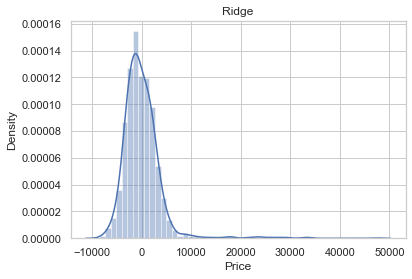

In [31]:
prediction_lasso = lasso.predict(X_test)
prediction_ridge = ridge.predict(X_test)

sns.distplot(y_test-prediction_ridge).set(title='Ridge')


C:\Users\deept\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


[Text(0.5, 1.0, 'Lasso')]

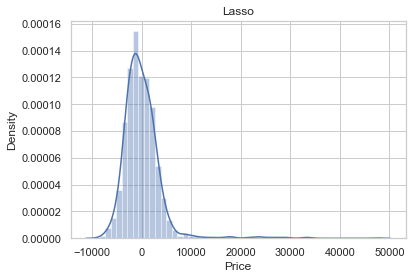

In [32]:
sns.distplot(y_test-prediction_lasso).set(title='Lasso')

**Lasso Regularisation using LassoCV**

In [33]:
# Lasso Regularization
# LassoCV will return best alpha and coefficients after performing 10 cross validations
lasscv = LassoCV(alphas=None,cv = 10, max_iter=100000,normalize= True)
lasscv.fit(X_train, y_train)

#best alpha parameter
alpha = lasscv.alpha_
alpha

C:\Users\deept\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Lasso())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
  warnings.warn(


LassoCV(cv=10, max_iter=100000, normalize=True)

0.4393024161546788

In [34]:
lasso_reg = Lasso(alpha)
lasso_reg.fit(X_train, y_train)
lasso_reg.score(X_test,y_test)

Lasso(alpha=0.4393024161546788)

0.8442830137814927

In [35]:
# Using Ridge regression model
# RidgeCV will return best alpha and coefficients after performing 10 cross validations. 
# We will pass an array of random numbers for ridgeCV to select best alpha from them

alphas = np.random.uniform(low=0,high=10,size=(50,))
ridgecv = RidgeCV(alphas= alphas,cv = 10, normalize = True)
ridgecv.fit(X_train,y_train)

ridgecv.alpha_

C:\Users\deept\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Ridge())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * n_samples. 
  warnings.warn(
C:\Users\deept\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preproce

C:\Users\deept\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Ridge())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * n_samples. 
  warnings.warn(
C:\Users\deept\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preproce

C:\Users\deept\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Ridge())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * n_samples. 
  warnings.warn(
C:\Users\deept\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preproce

C:\Users\deept\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Ridge())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * n_samples. 
  warnings.warn(
C:\Users\deept\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preproce

C:\Users\deept\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Ridge())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * n_samples. 
  warnings.warn(
C:\Users\deept\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preproce

C:\Users\deept\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Ridge())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * n_samples. 
  warnings.warn(
C:\Users\deept\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preproce

C:\Users\deept\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Ridge())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * n_samples. 
  warnings.warn(
C:\Users\deept\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preproce

C:\Users\deept\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Ridge())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * n_samples. 
  warnings.warn(
C:\Users\deept\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preproce

C:\Users\deept\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Ridge())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * n_samples. 
  warnings.warn(
C:\Users\deept\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preproce

C:\Users\deept\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Ridge())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * n_samples. 
  warnings.warn(
C:\Users\deept\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preproce

C:\Users\deept\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Ridge())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * n_samples. 
  warnings.warn(
C:\Users\deept\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preproce

C:\Users\deept\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Ridge())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * n_samples. 
  warnings.warn(
C:\Users\deept\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preproce

RidgeCV(alphas=array([7.97464984, 8.04311825, 3.86587664, 5.68611781, 7.90988263,
       5.2582279 , 5.79725649, 4.35887999, 7.85424323, 3.68733215,
       8.21091575, 1.7816977 , 9.92701453, 7.55778462, 3.48536332,
       6.64766386, 6.4388125 , 2.42099858, 8.5963667 , 2.67766225,
       8.53304084, 9.12040571, 2.76043398, 0.96307636, 9.74485863,
       8.18996482, 6.22618978, 3.25092315, 9.08663294, 5.67990352,
       7.92324816, 8.6116838 , 3.05679182, 9.76513584, 0.60125679,
       3.53558449, 2.64331374, 3.88423496, 9.63124344, 9.96487409,
       9.30711342, 1.63866099, 1.04461233, 5.71085035, 9.9089012 ,
       6.5552415 , 6.35245368, 3.47918342, 7.02989836, 5.56441663]),
        cv=10, normalize=True)

0.6012567945966807

In [36]:
ridge_model = Ridge(alpha=ridgecv.alpha_)
ridge_model.fit(X_train,y_train)

ridge_model.score(X_test,y_test)

Ridge(alpha=0.6012567945966807)

0.8442805187009099

**ElasticNetCV**

In [37]:
elasticCV = ElasticNetCV(alphas= None, cv=10)
elasticCV.fit(X_train,y_train)

elasticCV.alpha_

ElasticNetCV(cv=10)

25888.102730031726

In [38]:
# l1_ration gives how close the model is to L1 regularization, below value indicates we are giving equal
#preference to L1 and L2
elasticCV.l1_ratio

0.5

In [39]:
elasticnet_reg = ElasticNet(alpha = elasticCV.alpha_, l1_ratio = 0.5)
elasticnet_reg.fit(X_train,y_train)
elasticnet_reg.score(X_test,y_test)

ElasticNet(alpha=25888.102730031726)

0.17111208597887684

**Performance Metrics**

In [40]:
model = LinearRegression()
mse = cross_val_score(model,X,y,scoring='neg_mean_squared_error',cv = 5)
mean_mse = np.mean(mse)
print(mse)
print(mean_mse)

[-14775911.26087935 -13188953.04175287 -17279240.40786116
 -17198496.95719241 -16731665.29628586]
-15834853.392794332


These metrics would be good for comparing models but simple linear regression itself is performing the best in our case so we'll compare it with elastic net

In [41]:
mean_absolute_error(y_test,y_pred)

2534.6857826248224

In [42]:
mean_squared_error(y_test,y_pred)

16740980.878988931

In [43]:
#RMSE
np.sqrt(mean_squared_error(y_test,y_pred))

4091.574376568136